In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
import requests
import base64
from elasticsearch import Elasticsearch
from urllib import parse
import pandas as pd
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from code_utils.elastic import get_data_from_elastic,plot_graph,interfaces_evaluation

Visualization of the contribution of each countries in ipcc references - all wgs

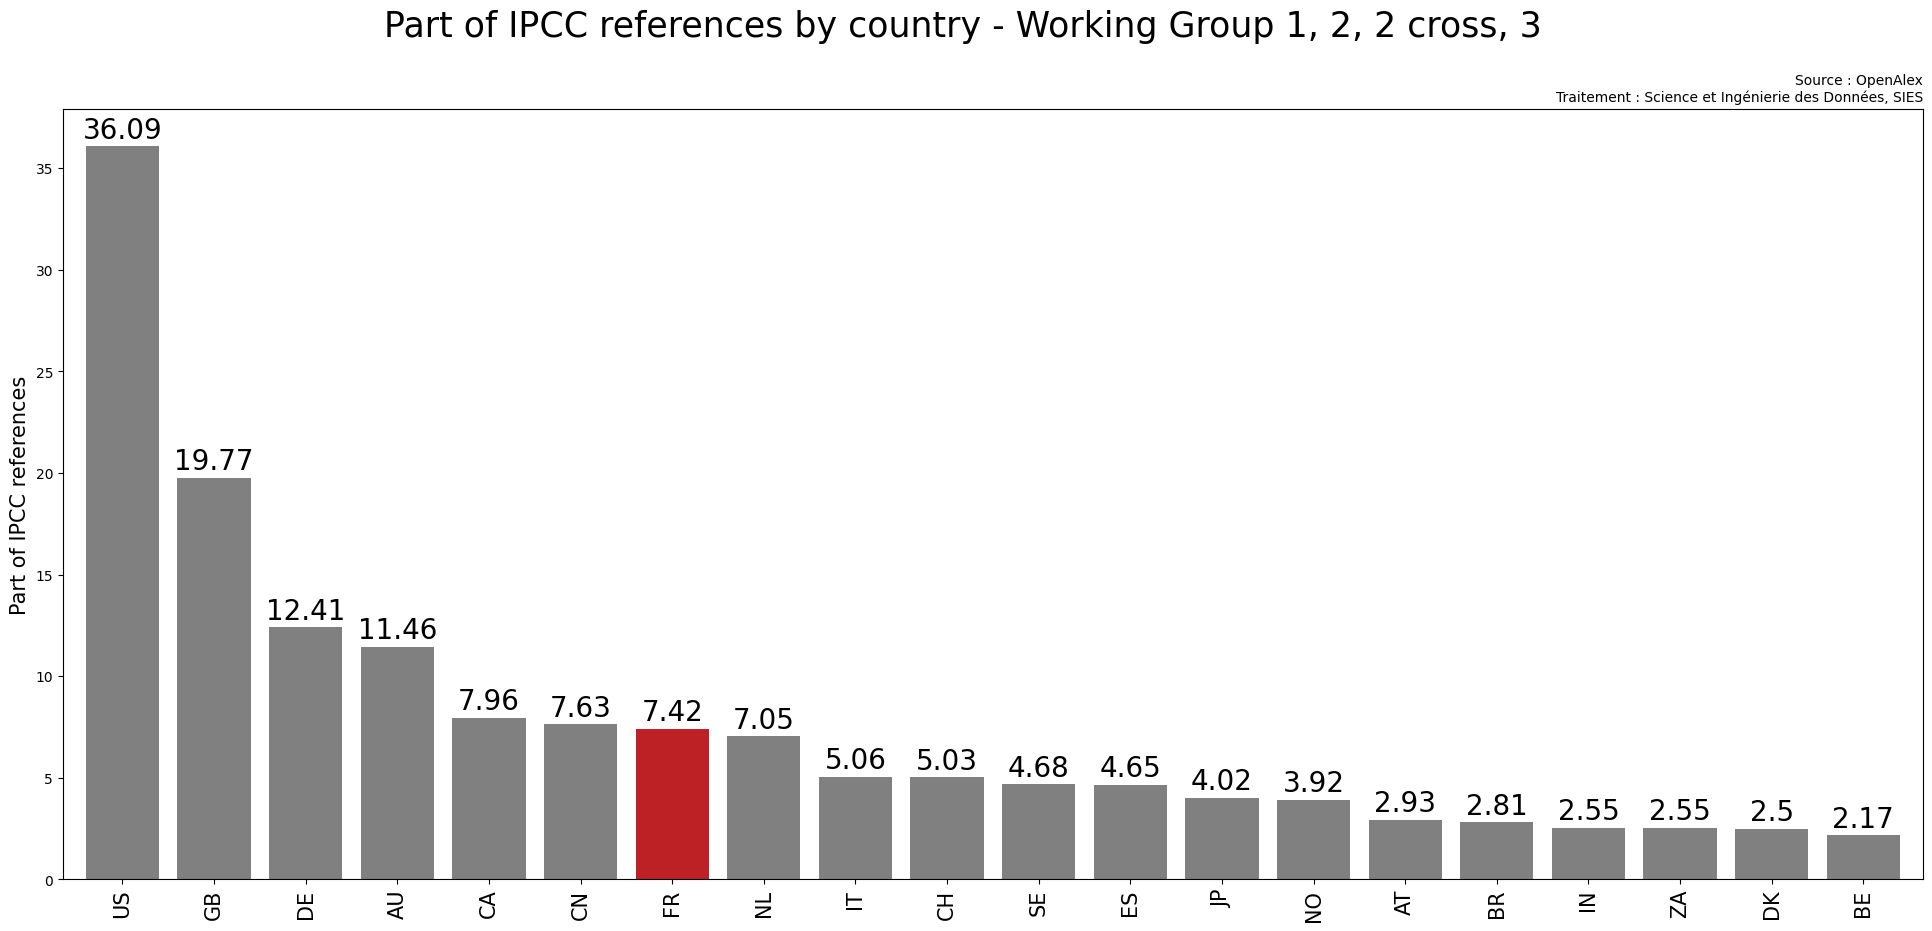

In [2]:
list_wg=["1","2","2_cross","3"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipcc.wg.keyword': x}} for x in list_wg],
                'minimum_should_match': 1
            }),list_wg)

Visualization of the contribution of each countries in ipcc references - wg1,wg2,wg3

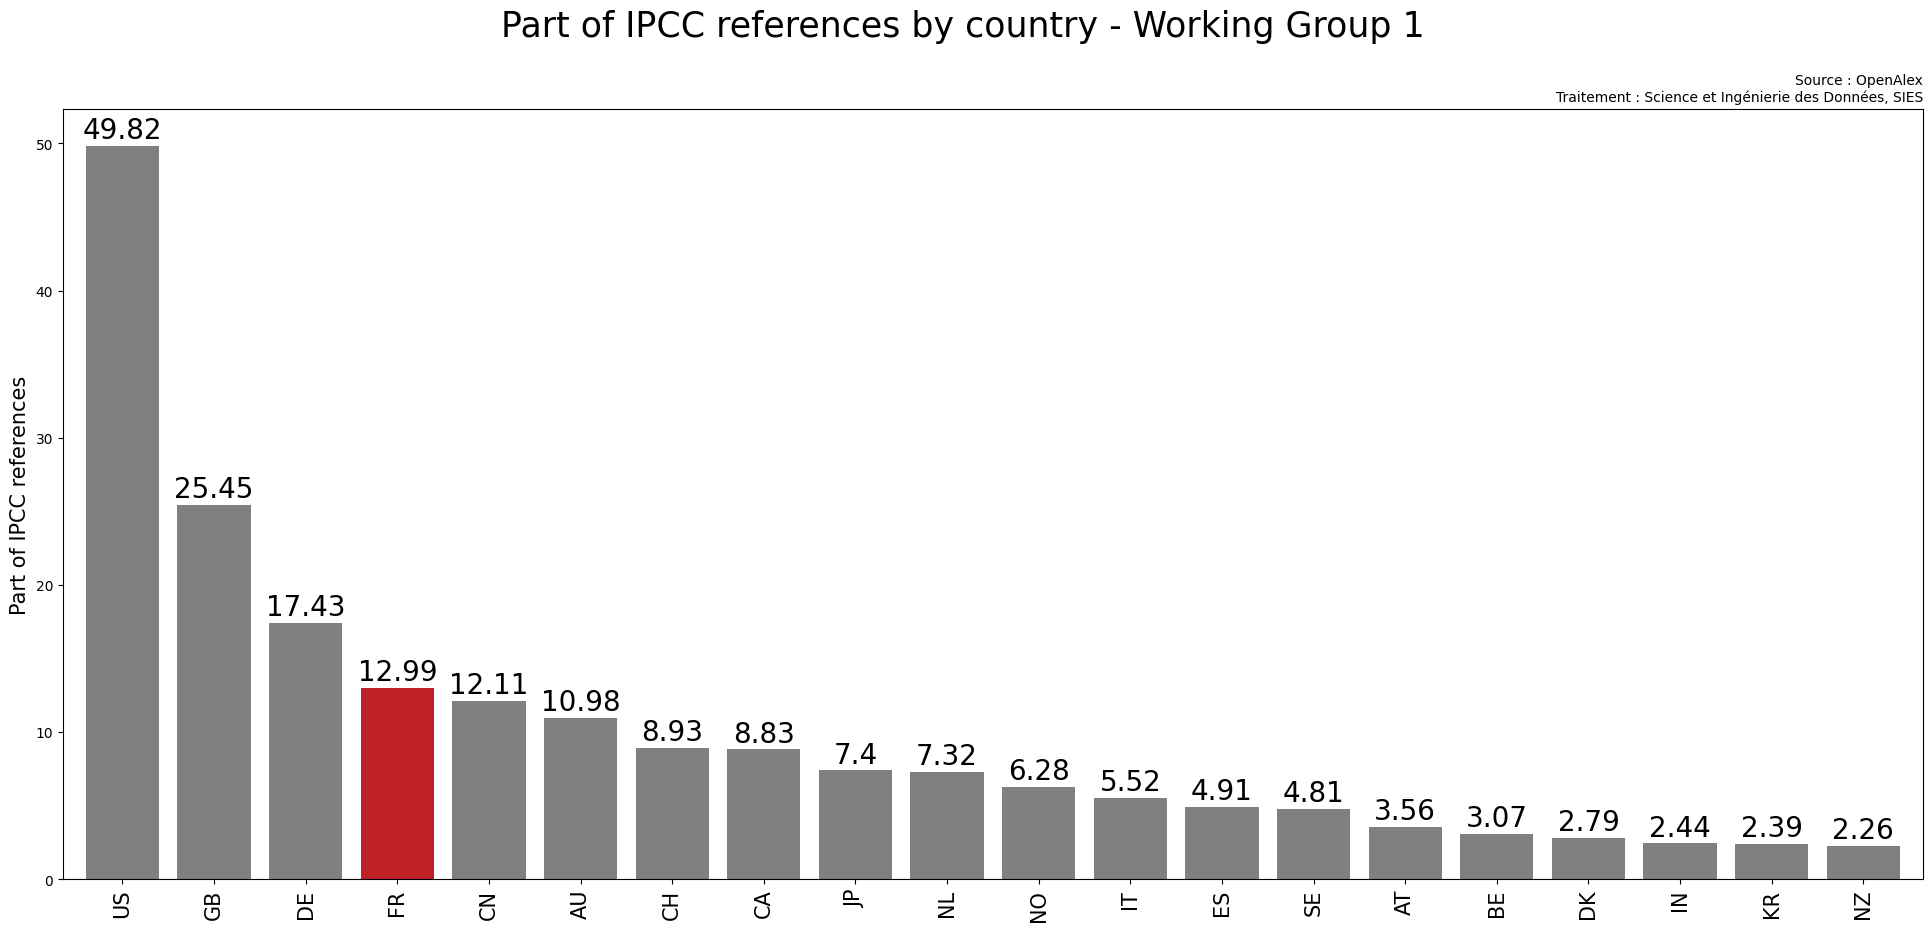

In [3]:
list_wg=["1"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg)

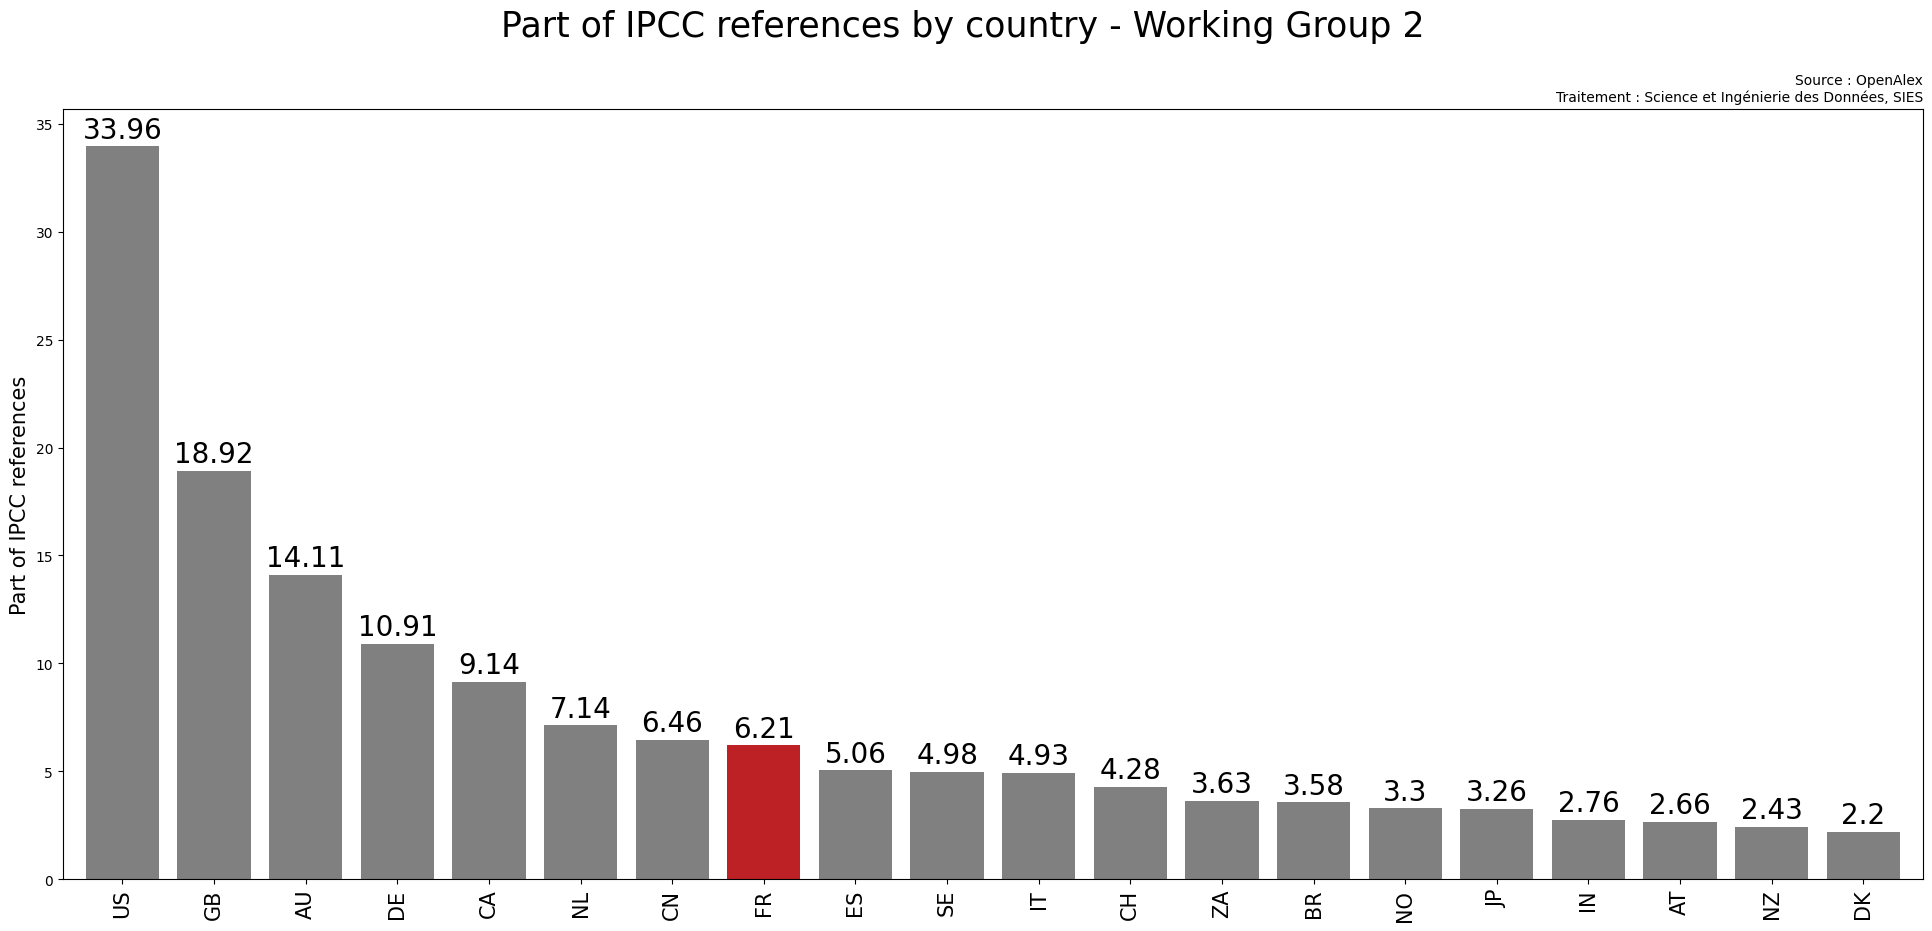

In [4]:
list_wg=["2"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg)

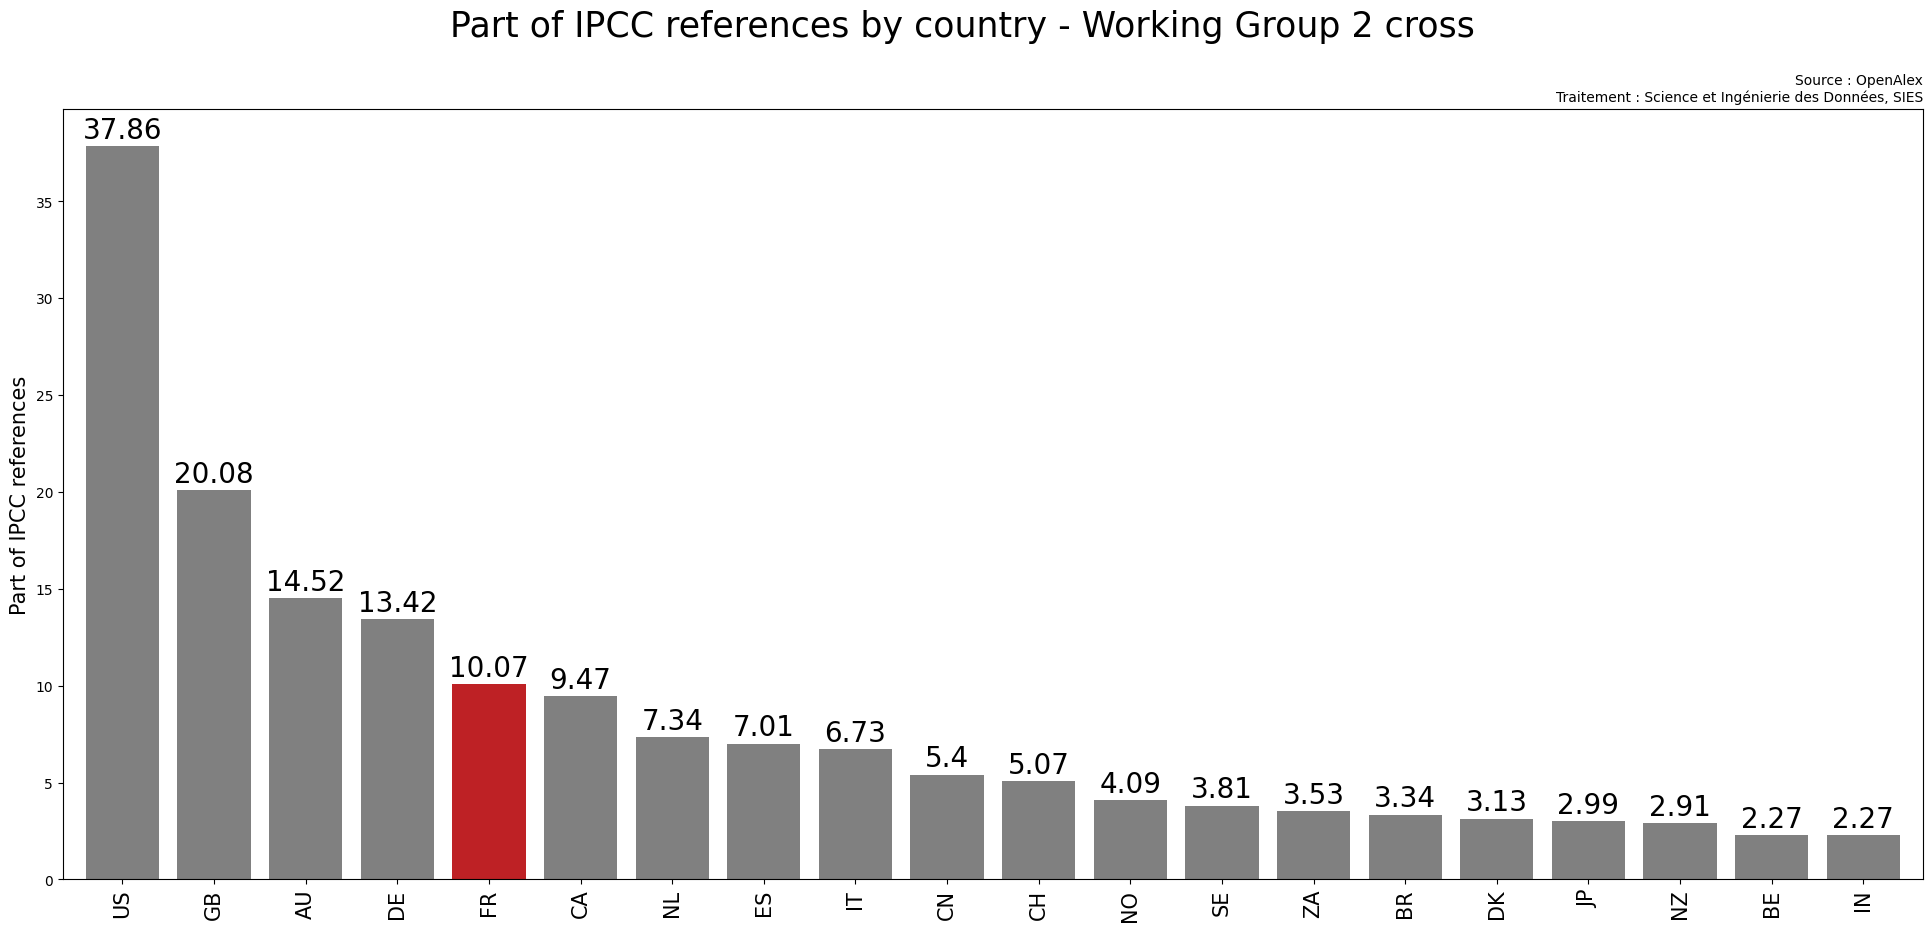

In [22]:
list_wg=["2_cross"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg)

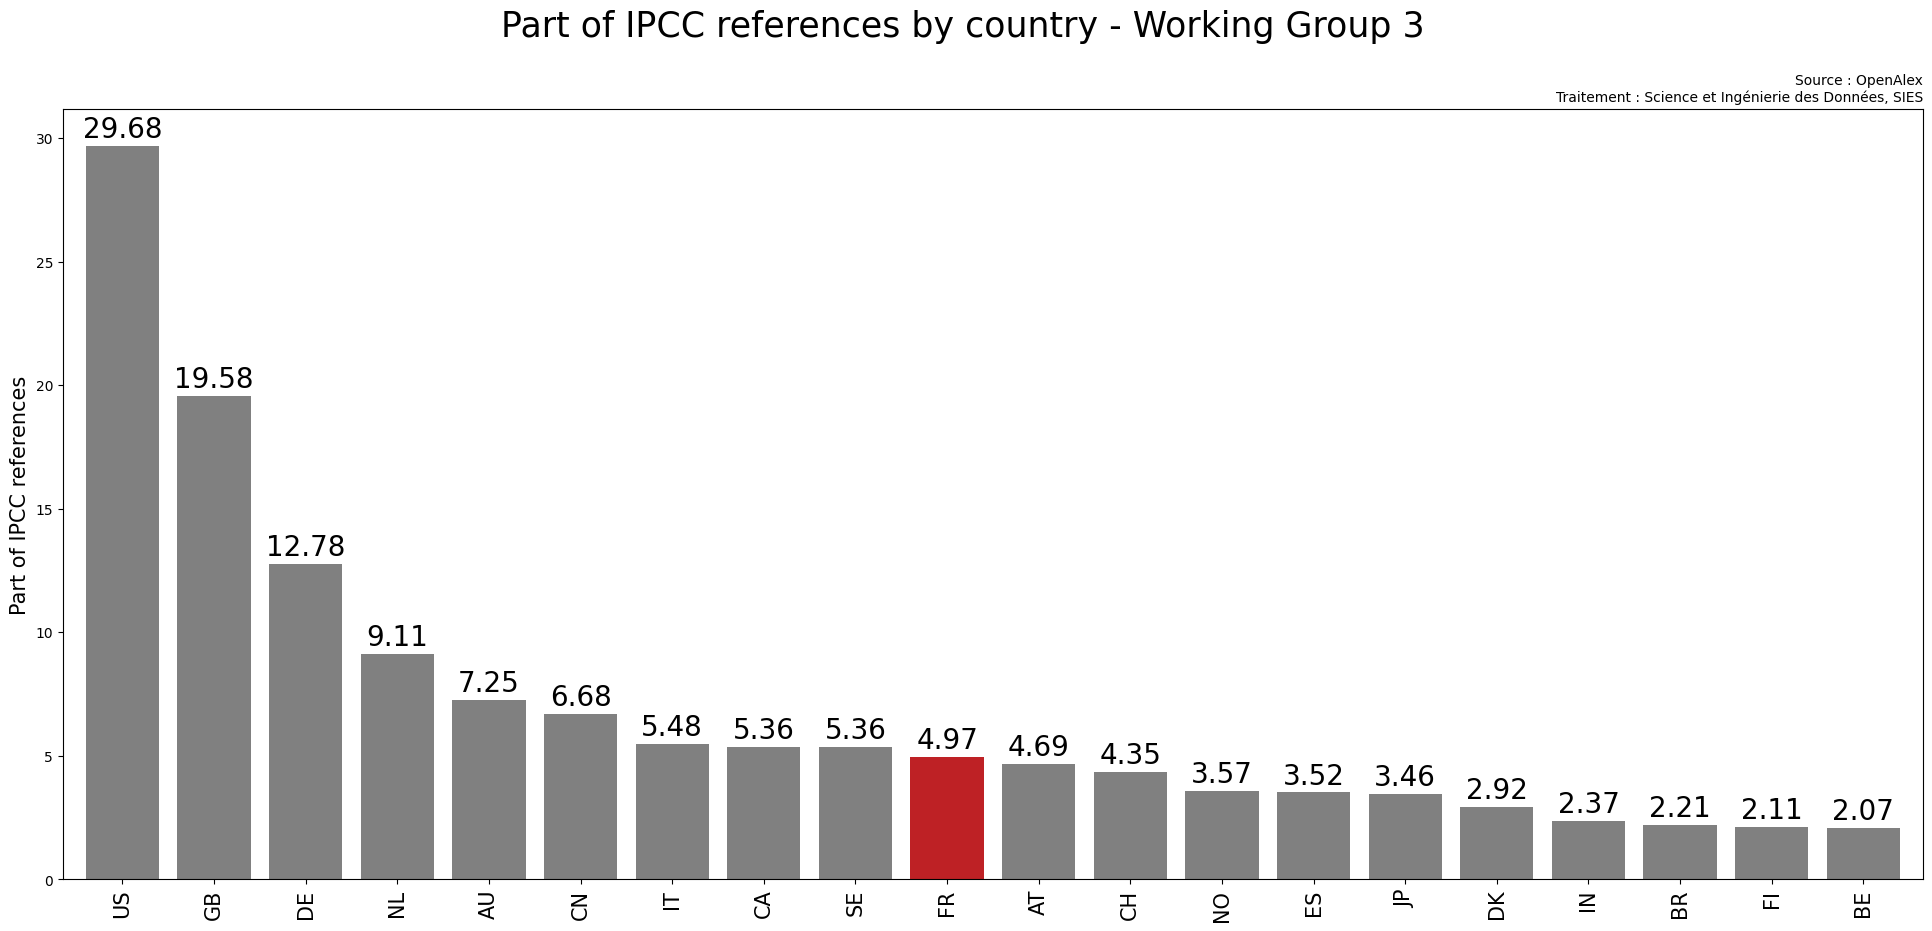

In [5]:
list_wg=["3"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg)

Visualization of the contribution of each countries in ipcc references - wg1 or wg2

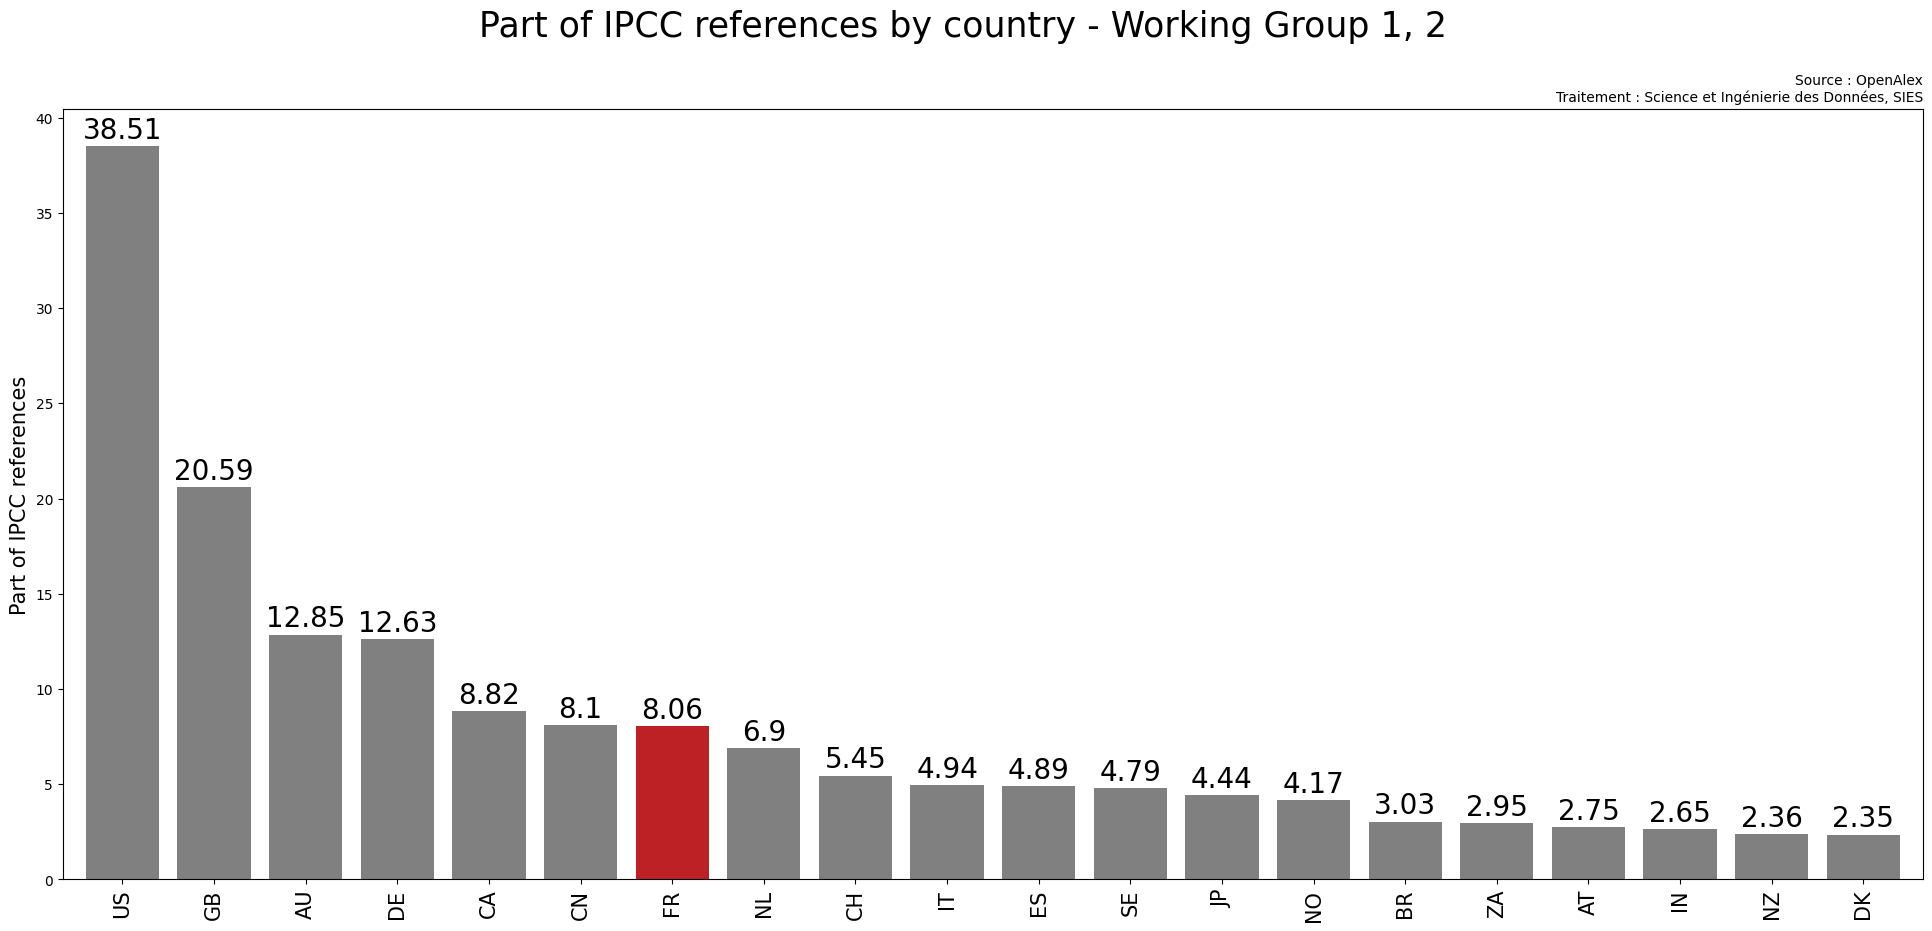

In [6]:
list_wg=["1","2"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipcc.wg.keyword': x}} for x in list_wg],
                'minimum_should_match': 1
            }),list_wg)

Visualization of the contribution of each countries in ipcc references - wg1 and wg2

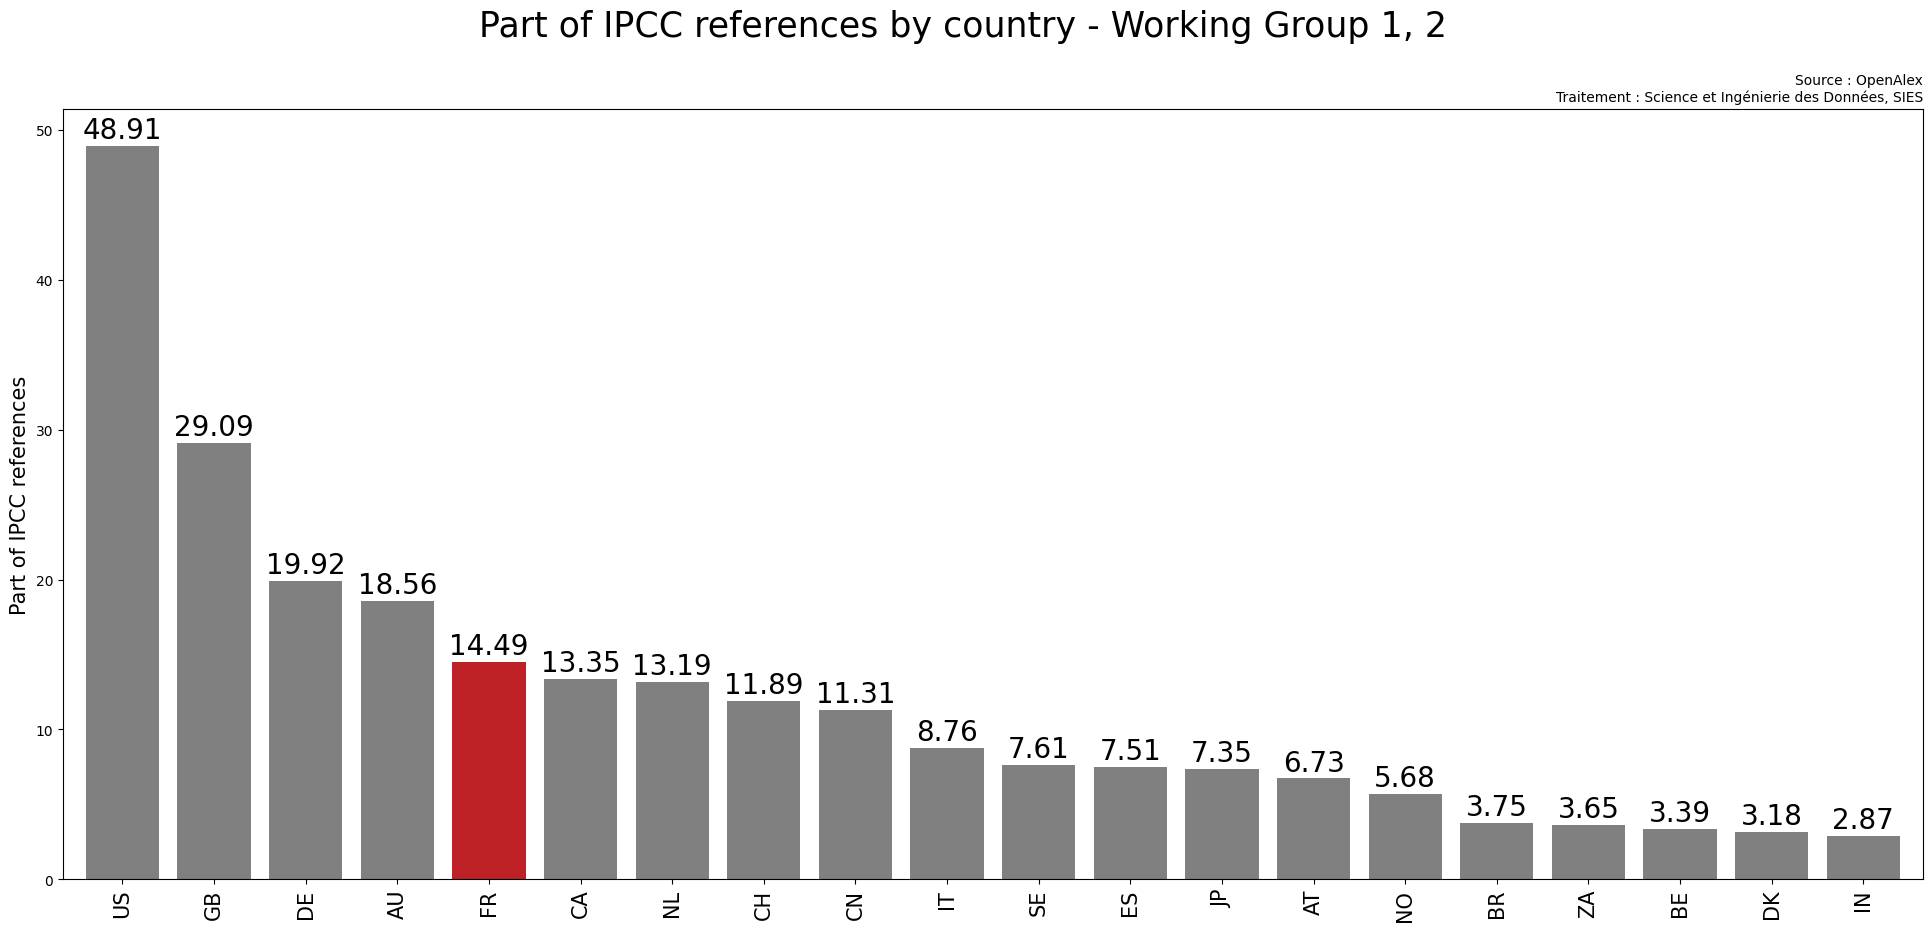

In [7]:
list_wg=["1","2"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': x}} for x in list_wg]
            }),list_wg)

Visualization of the contribution of each countries in ipcc references - french interfaces

In [8]:
interfaces_evaluation(['1','2'],'FR')

Pour la recherches aux interfaces, pour les working groups 1, 2, 
8.98 % des publications citées dans l'un des groupes le sont aussi dans le.s autre.s


In [9]:
interfaces_evaluation(['1','3'],'FR')

Pour la recherches aux interfaces, pour les working groups 1, 3, 
2.26 % des publications citées dans l'un des groupes le sont aussi dans le.s autre.s


In [10]:
interfaces_evaluation(['2','3'],'FR')

Pour la recherches aux interfaces, pour les working groups 2, 3, 
5.01 % des publications citées dans l'un des groupes le sont aussi dans le.s autre.s


In [11]:
interfaces_evaluation(['1','2','3'],'FR')

Pour la recherches aux interfaces, pour les working groups 1, 2, 3, 
0.61 % des publications citées dans l'un des groupes le sont aussi dans le.s autre.s


Visualization of the contribution of each countries in ipcc references - number of references

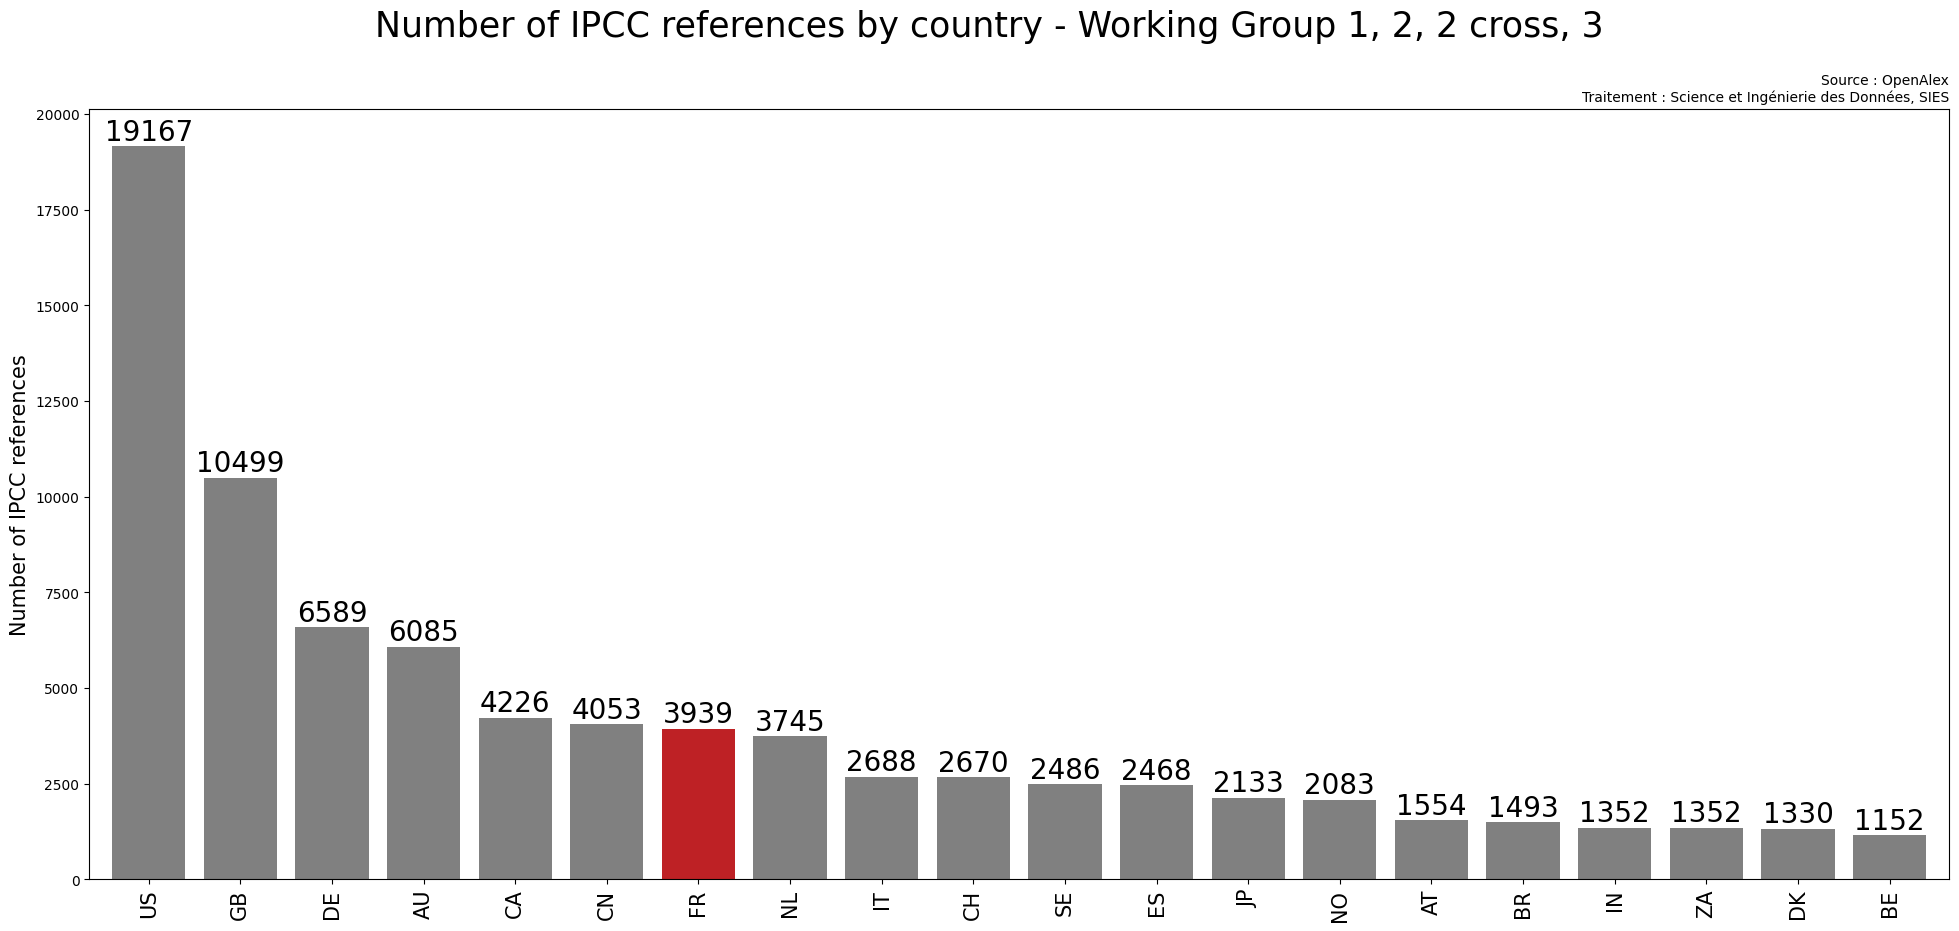

In [17]:
list_wg=["1","2","2_cross","3"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipcc.wg.keyword': x}} for x in list_wg],
                'minimum_should_match': 1
            }), list_wg, type='Number')

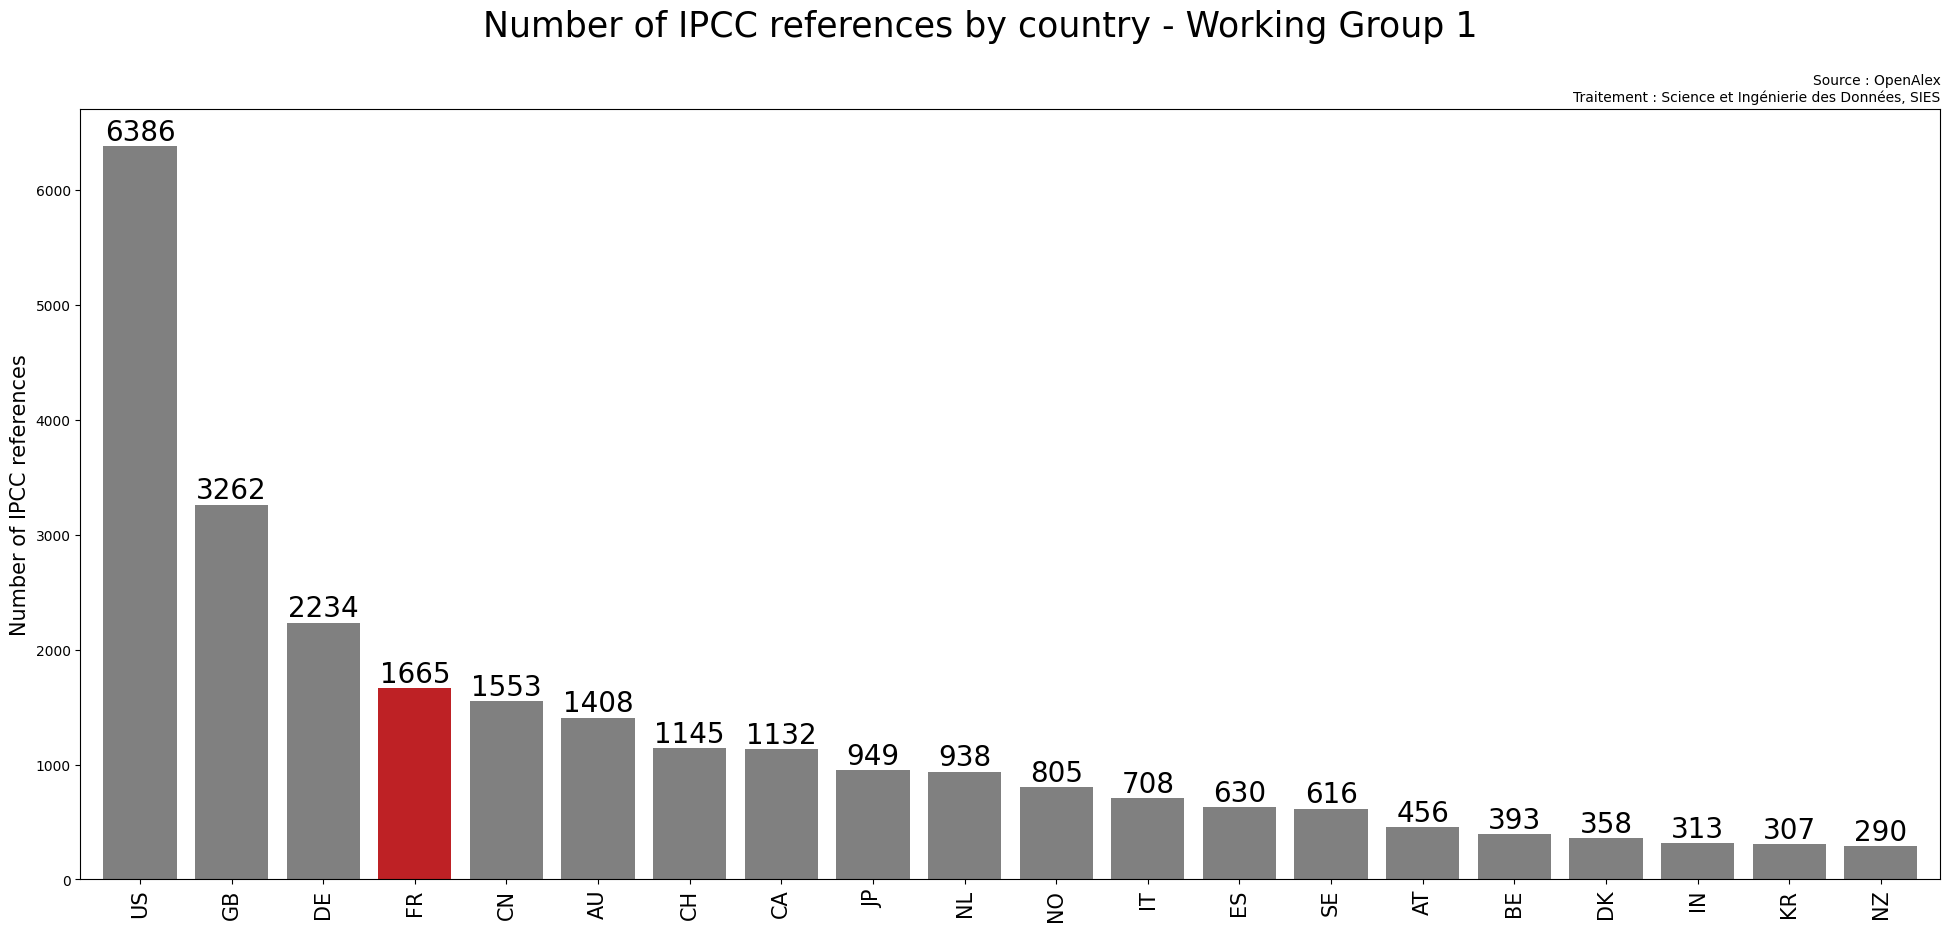

In [18]:
list_wg=["1"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg, type='Number')

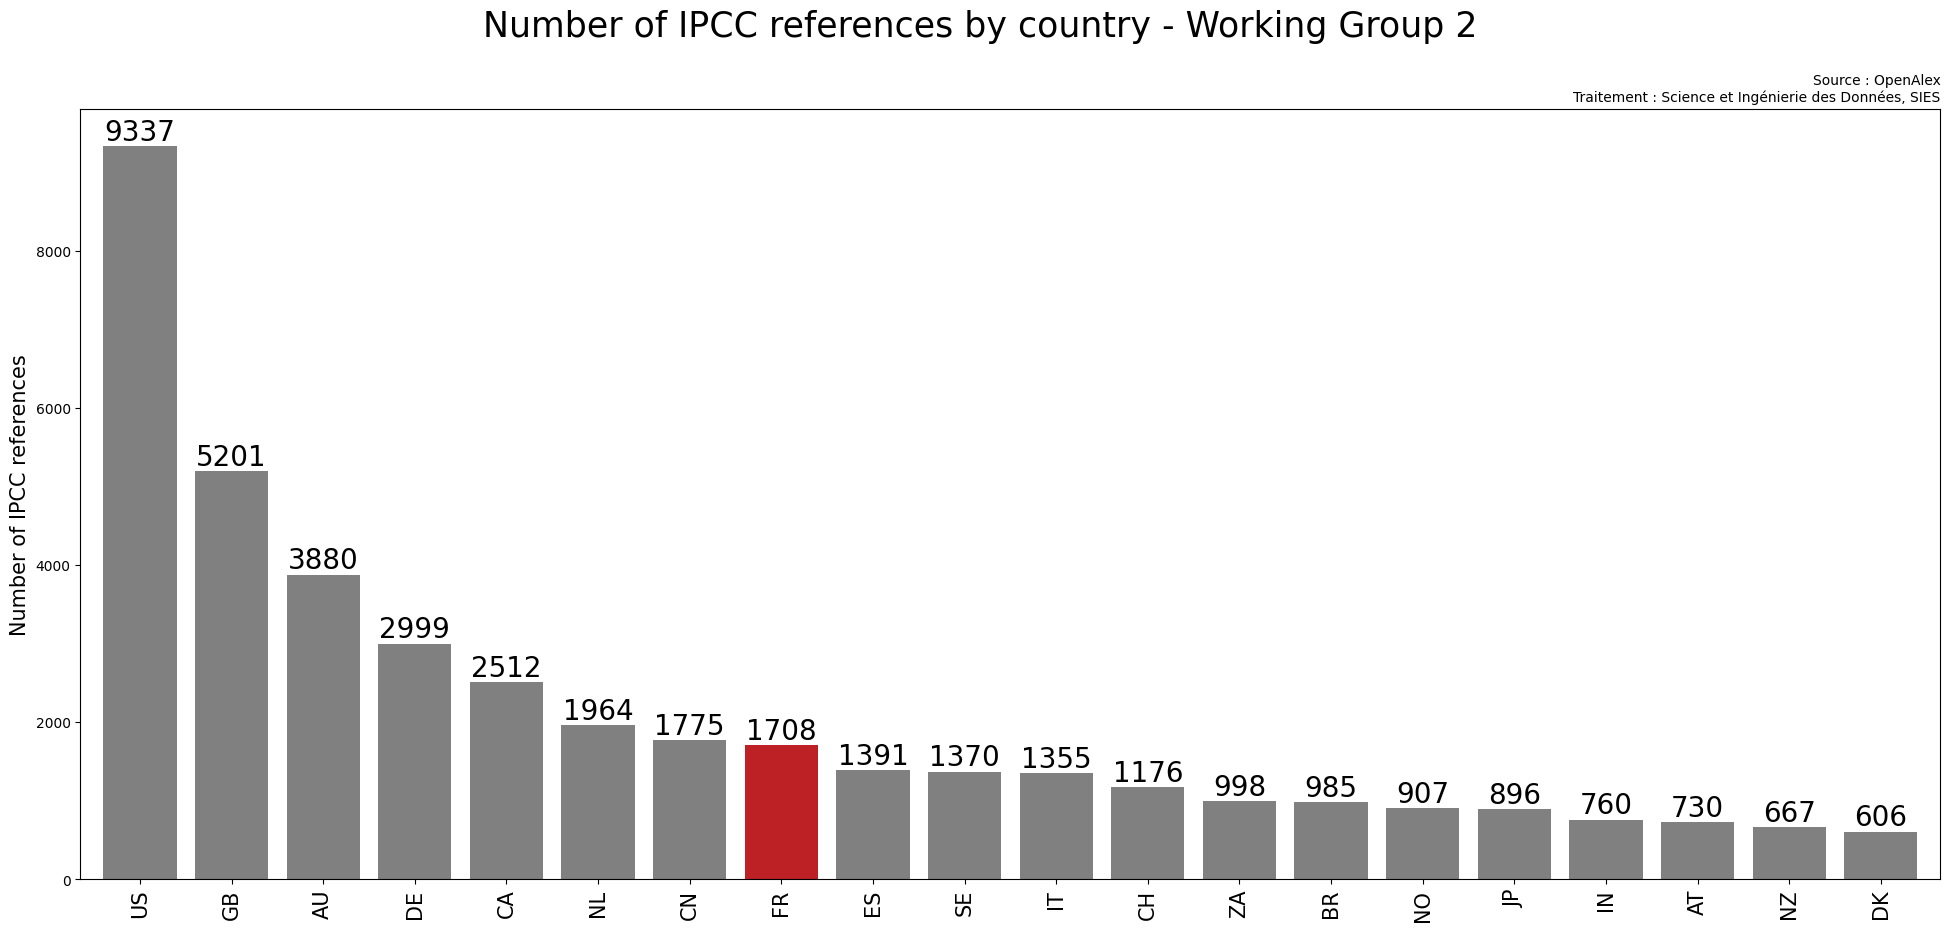

In [19]:
list_wg=["2"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg, type='Number')

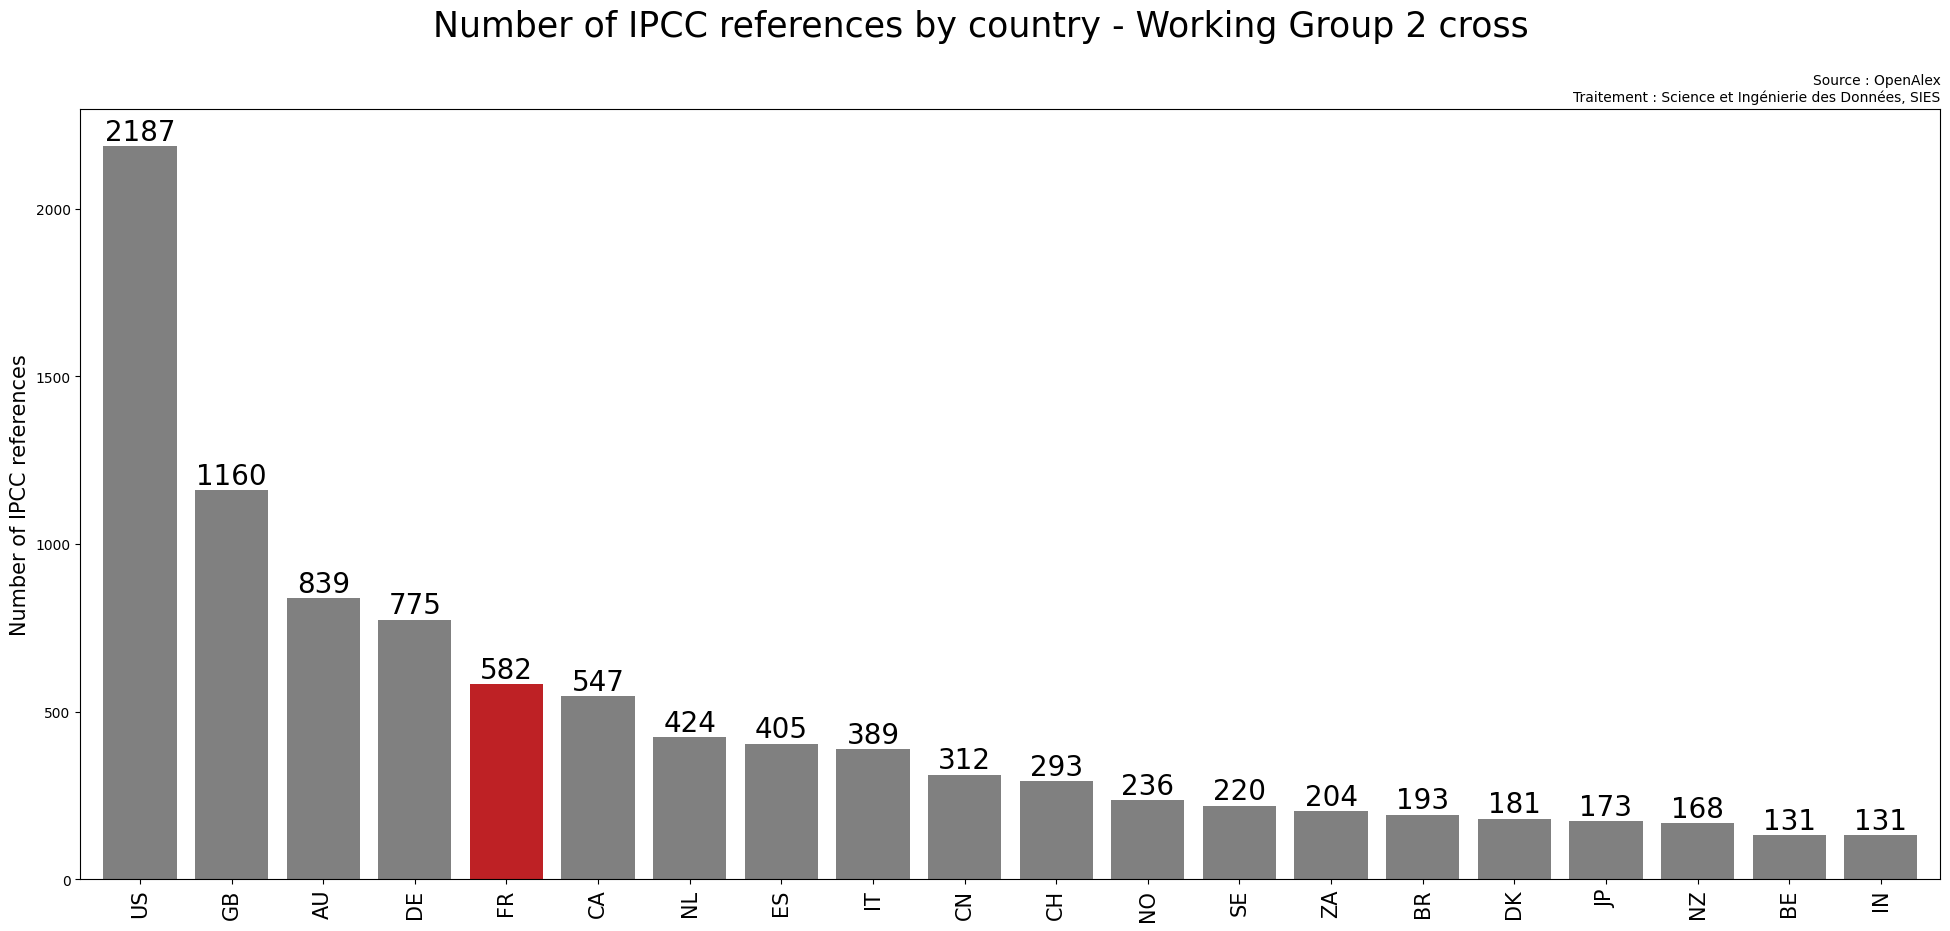

In [21]:
list_wg=["2_cross"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg, type='Number')

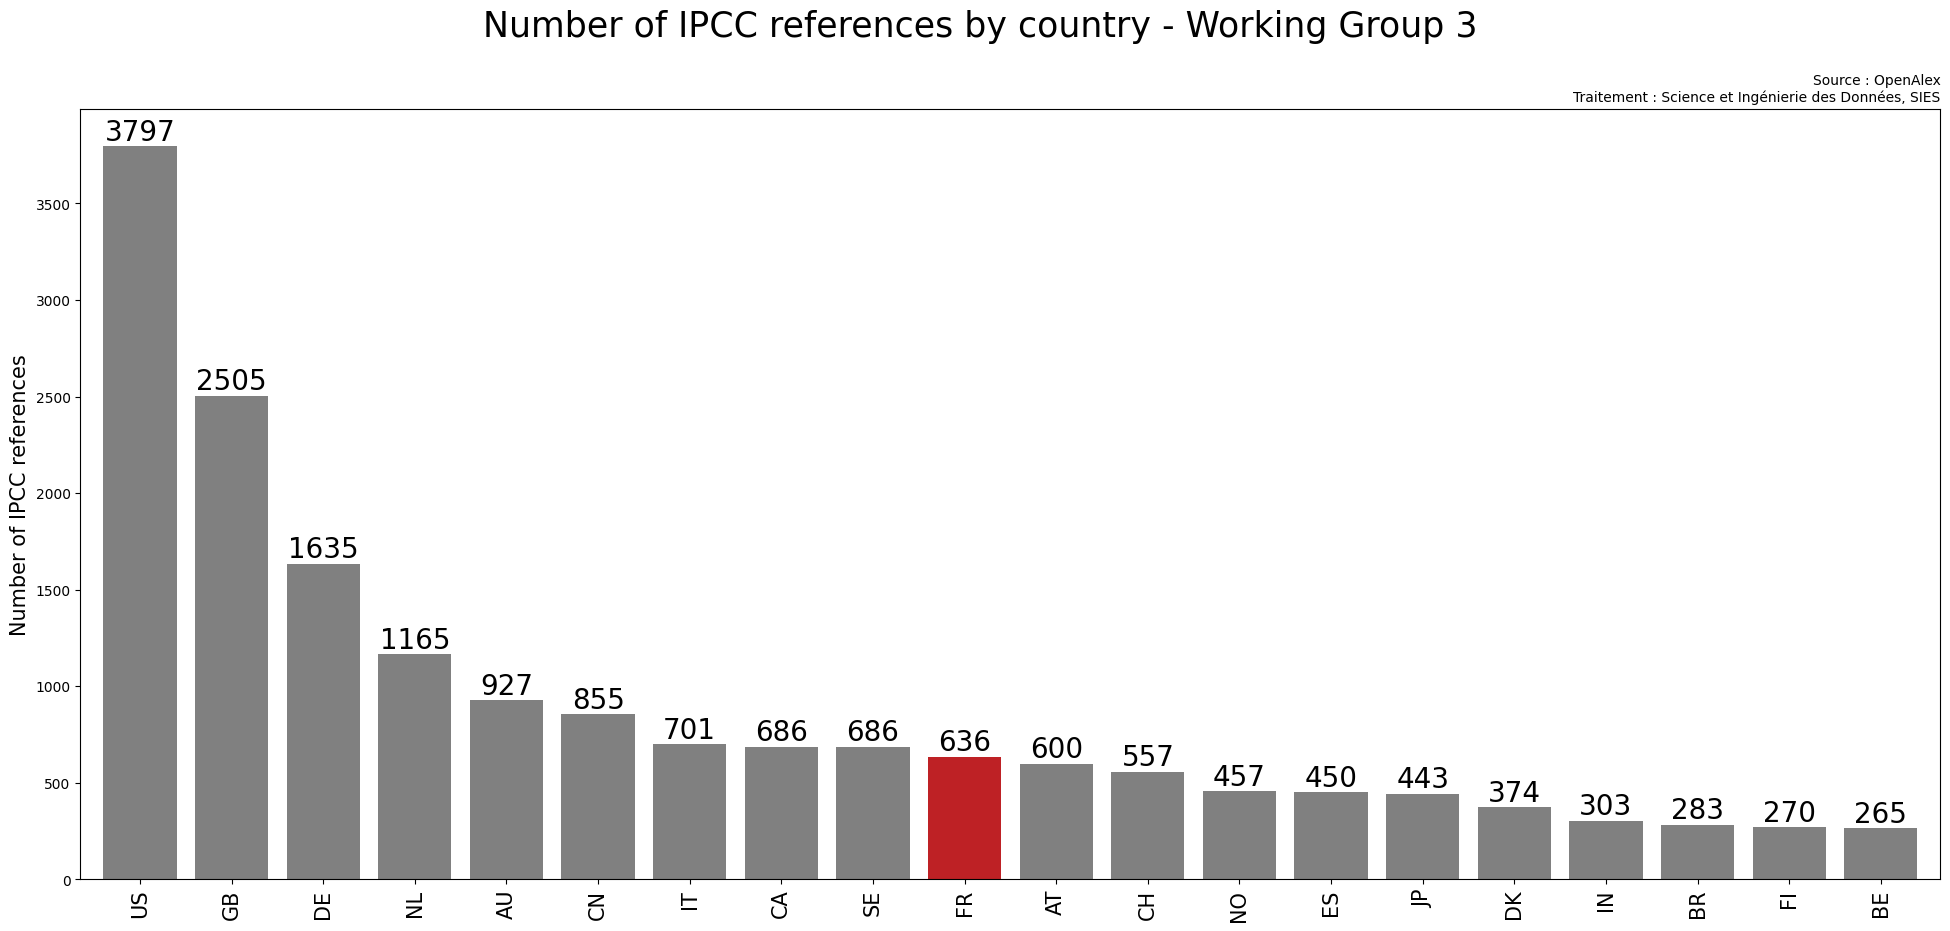

In [20]:
list_wg=["3"]
plot_graph(get_data_from_elastic({
                'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}]
            }),list_wg, type='Number')

IPBES

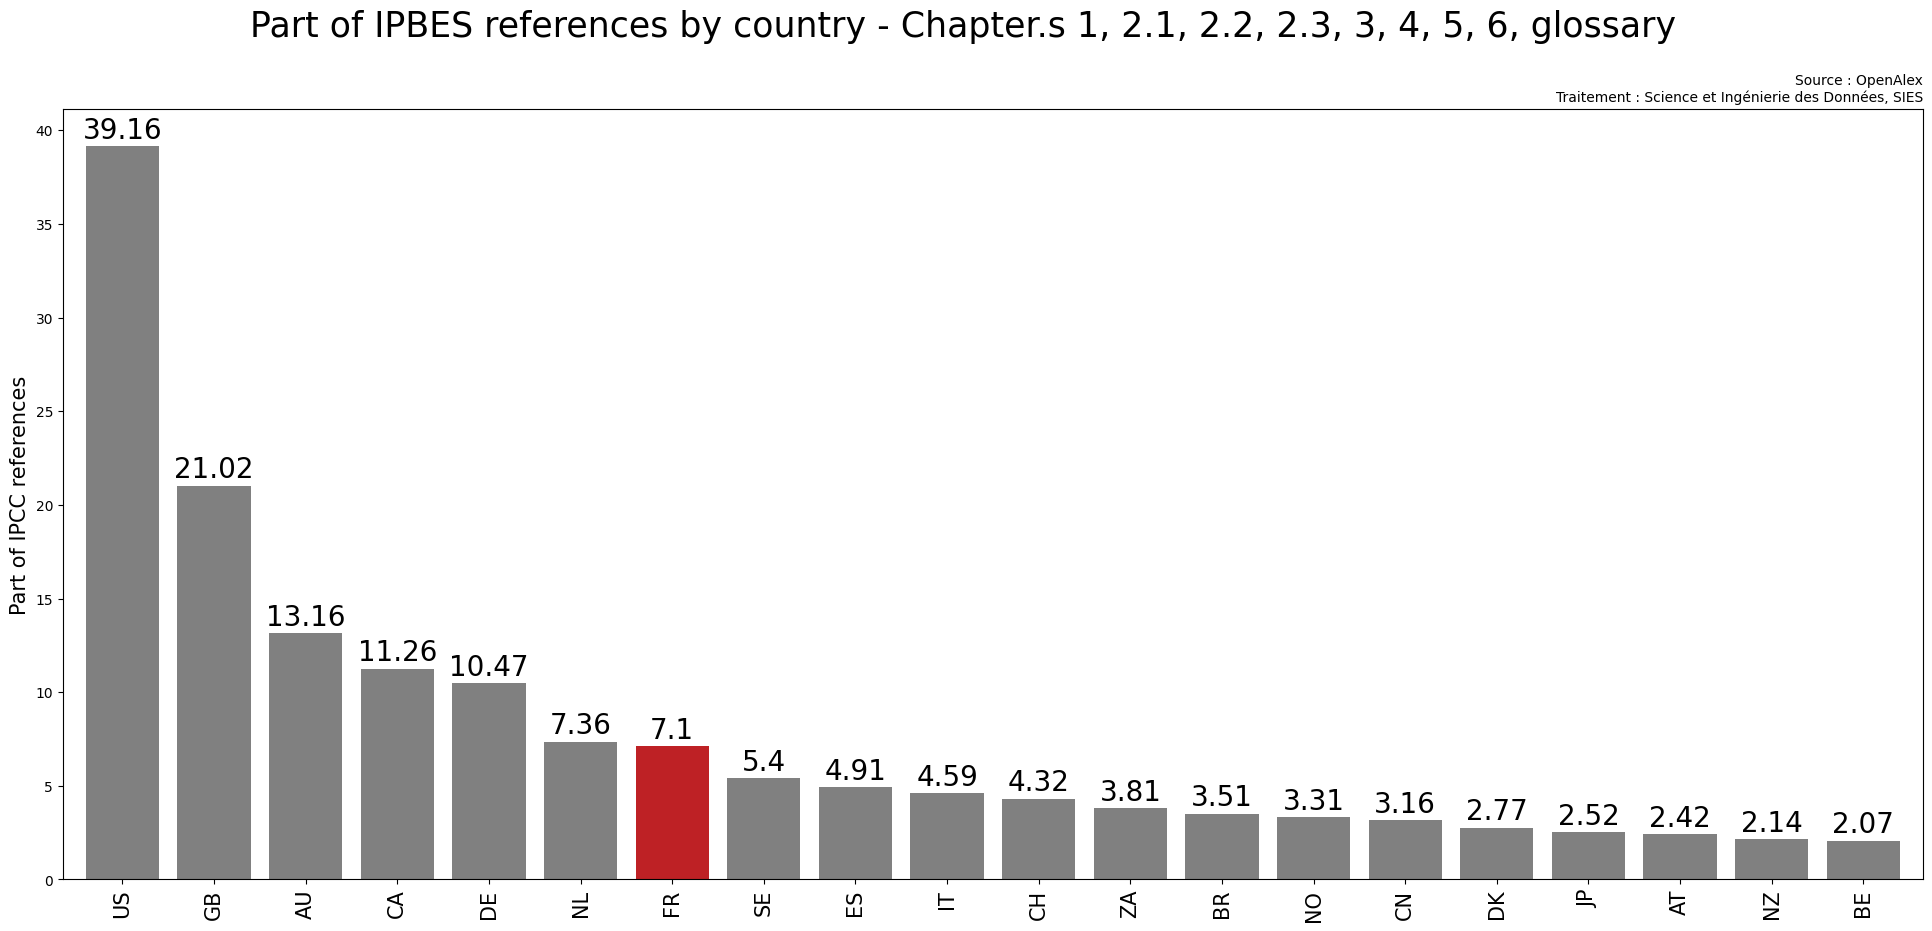

In [2]:
list_chap=["1","2.1","2.2","2.3","3","4","5","6","glossary"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipbes.chapter.keyword': x}} for x in list_chap],
                'minimum_should_match': 1
            }),list_chap, ip=['IPBES','Chapter.s'])

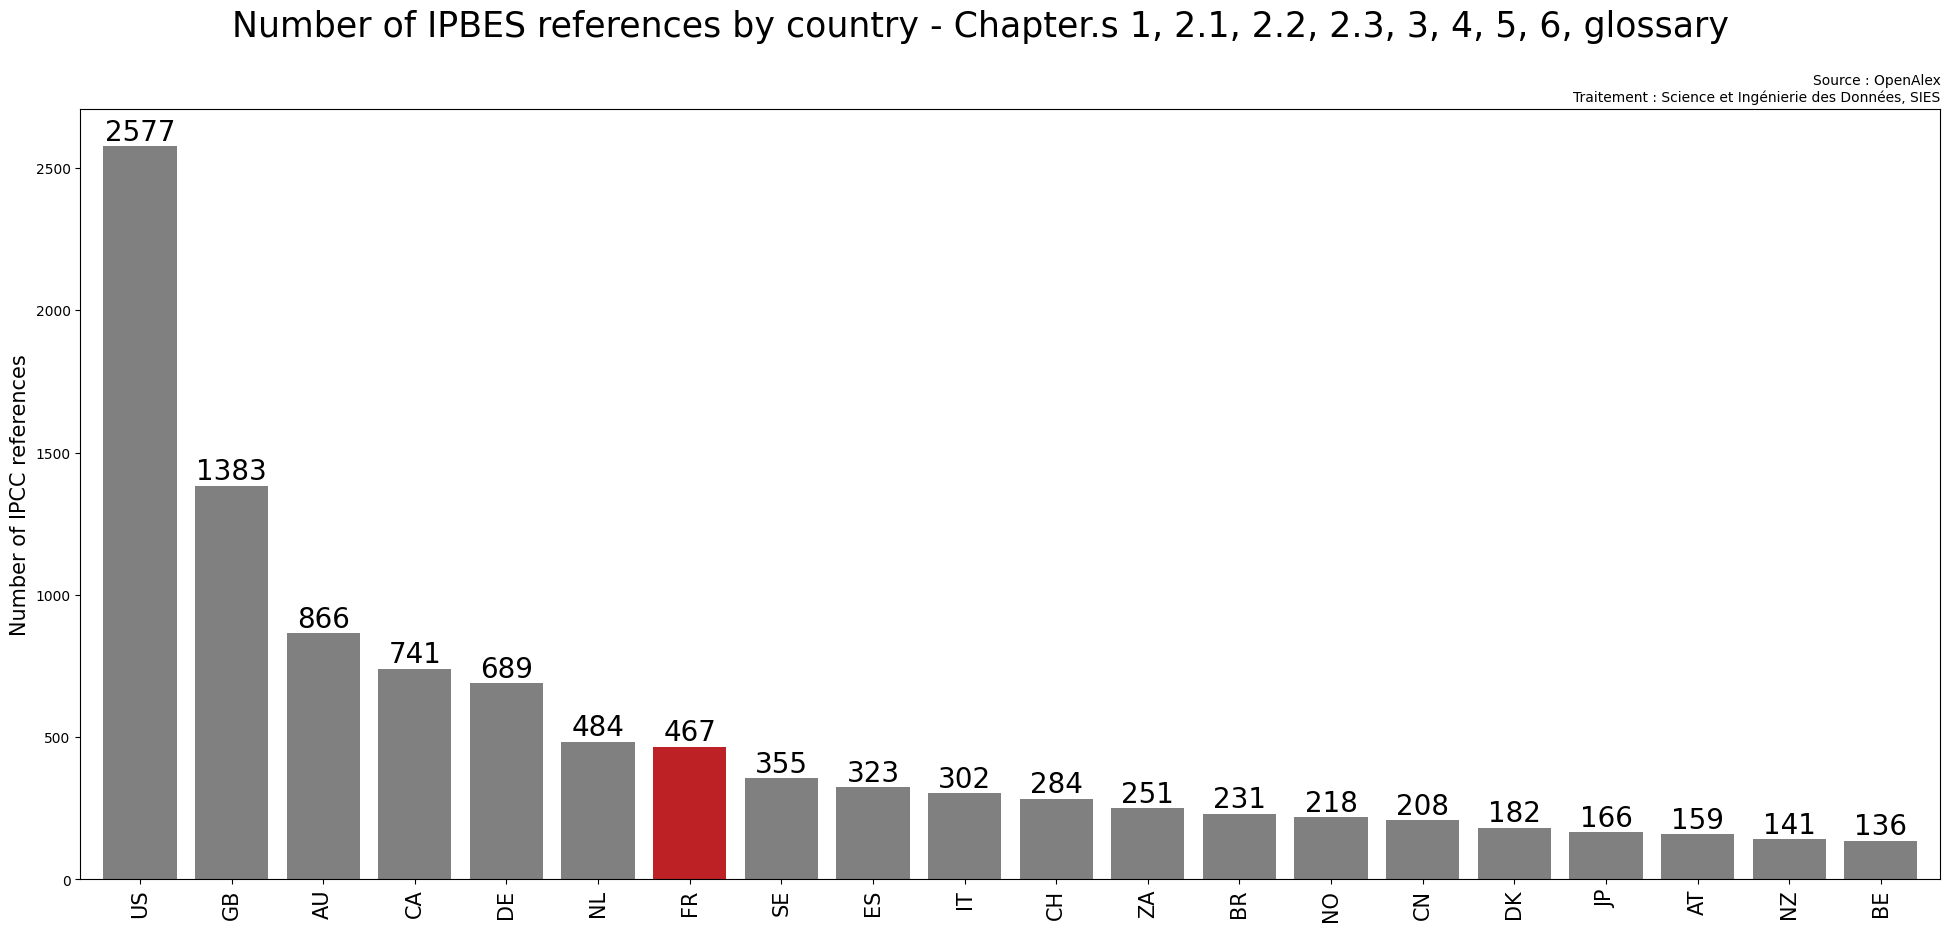

In [3]:
list_chap=["1","2.1","2.2","2.3","3","4","5","6","glossary"]
plot_graph(get_data_from_elastic({
                'should': [{'term': {'ipbes.chapter.keyword': x}} for x in list_chap],
                'minimum_should_match': 1
            }),list_chap, type='Number', ip=['IPBES','Chapter.s'])

repartitions

In [313]:
list_wg=["1","2","2_cross","3"]
filter1={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[1]}},
                            {'match': {'ipcc.wg.keyword': list_wg[2]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter2={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[1]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[2]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter2cross={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[2]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[1]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter3={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[3]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[1]}},
                            {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }
filter12={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                        {'match': {'ipcc.wg.keyword': list_wg[1]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[2]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter12cross={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                        {'match': {'ipcc.wg.keyword': list_wg[2]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[1]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter13={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                        {'match': {'ipcc.wg.keyword': list_wg[3]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[1]}},
                            {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }
filter22cross={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[1]}},
                        {'match': {'ipcc.wg.keyword': list_wg[2]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter23={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[1]}},
                        {'match': {'ipcc.wg.keyword': list_wg[3]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }
filter32cross={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[2]}},
                        {'match': {'ipcc.wg.keyword': list_wg[3]}}],
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                            {'match': {'ipcc.wg.keyword': list_wg[1]}}]
        }
filter122cross3={
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                     {'match': {'ipcc.wg.keyword': list_wg[1]}},
                     {'match': {'ipcc.wg.keyword': list_wg[2]}},
                     {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter122cross={
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[3]}}],
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                     {'match': {'ipcc.wg.keyword': list_wg[1]}},
                     {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }
filter123={
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[2]}}],
            'must': [{'match': {'ipcc.wg.keyword': list_wg[0]}},
                     {'match': {'ipcc.wg.keyword': list_wg[1]}},
                     {'match': {'ipcc.wg.keyword': list_wg[3]}}]
        }
filter12cross3={
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[1]}}],
            'must': [{'match': {'ipcc.wg.keyword': list_wg[3]}},
                     {'match': {'ipcc.wg.keyword': list_wg[0]}},
                     {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }
filter22cross3={
            'must_not': [{'match': {'ipcc.wg.keyword': list_wg[0]}}],
            'must': [{'match': {'ipcc.wg.keyword': list_wg[3]}},
                     {'match': {'ipcc.wg.keyword': list_wg[1]}},
                     {'match': {'ipcc.wg.keyword': list_wg[2]}}]
        }

In [314]:
list_colors=['#aec7e8','#042f66','#D891EF','#5865F2','#D16587','#F8B88B',"#7E354D",'#8B8000','#22CE83','#FF6700','#F62217','#FF69B4','#E238EC','#A23BEC']

In [331]:
filters=[filter1,filter2,filter3,filter12,filter12cross,filter13,filter22cross,filter23,filter32cross,filter122cross3,filter122cross,filter123,filter12cross3,filter22cross3]
values=[]
for i in range(len(filters)):
    value={}
    data=get_data_from_elastic(filters[i],50)
    groups= ['US','GB','DE','FR','CN']
    tot={'US':19167,'GB':10499,'DE':6589,'FR':3939,'CN':4053}
    for x in data.get('aggregations').get('by_countries').get('buckets'):
        for k in range(len(groups)):
            if groups[k]== x.get('key'):
                value[groups[k]]=x.get('doc_count')
    ordered_value={j: round(value[j]*100/tot[j]) if j in value else 0 for j in groups}
    values.append(list(ordered_value.values()))

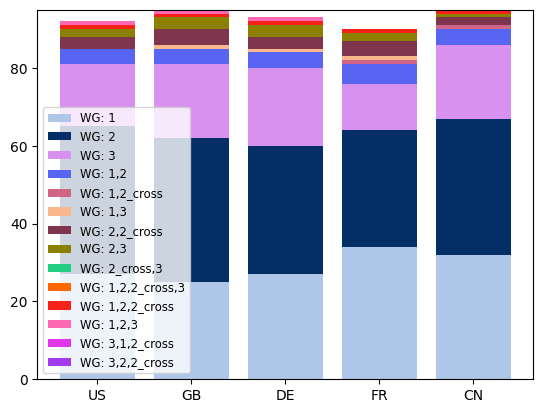

In [332]:
import matplotlib.pyplot as plt
import numpy as np

groups= ['US','GB','DE','FR','CN']
fig, ax = plt.subplots()
values_array=np.array(values)

for i in range(values_array.shape[0]):
  ax.bar(groups, values_array[i], bottom = np.sum(values_array[:i], axis = 0), color=list_colors[i], label=(f"WG: {','.join([x.get('match').get('ipcc.wg.keyword') for x in filters[i].get('must')])}"))

ax.legend(fontsize='small')
plt.show() 

In [333]:
wg_simple=list(map(sum, zip(*values[:4])))

In [334]:
wg_simple

[85, 85, 84, 81, 90]

In [335]:
values_simple=values[:4]+[[100 - wg_simple[i] for i in range(len(wg_simple))]]

C:\Users\haallat\AppData\Local\Temp\ipykernel_1564\2550371538.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, size=10)


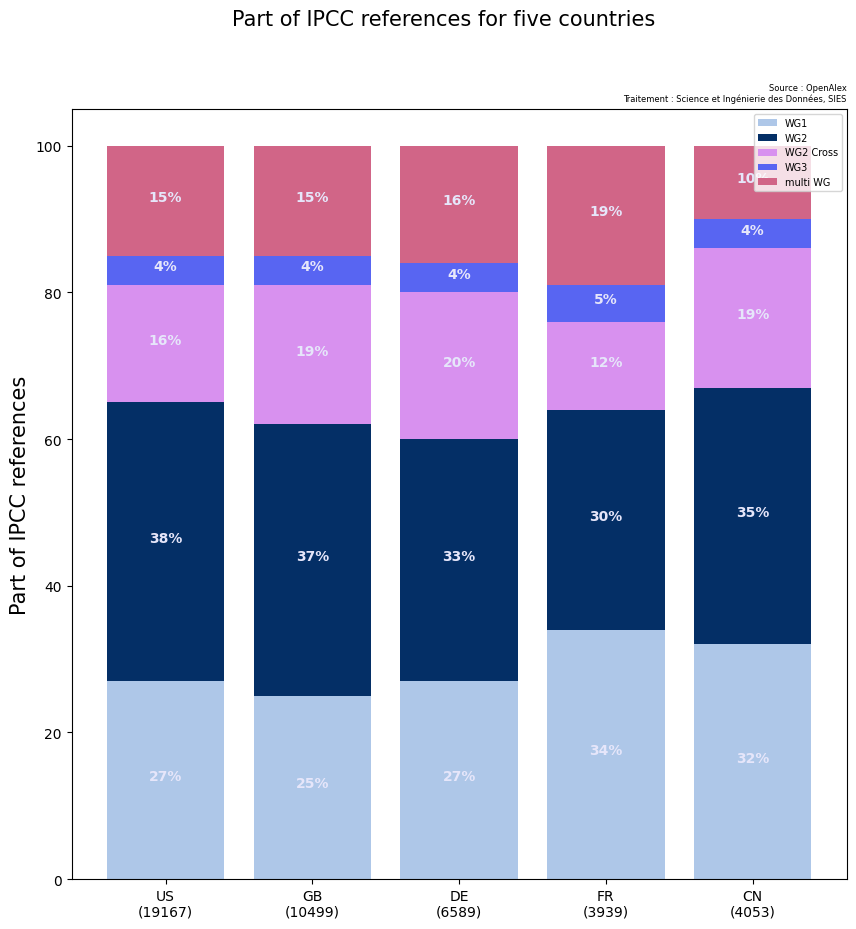

In [336]:
import matplotlib.pyplot as plt
import numpy as np

groups= ['US','GB','DE','FR','CN']
fig, ax = plt.subplots(figsize=(10, 10))
values_array=np.array(values_simple)
labels=['WG1','WG2','WG2 Cross','WG3','multi WG']
tot={'US':19167,'GB':10499,'DE':6589,'FR':3939,'CN':4053}

for i in range(values_array.shape[0]):
  ax.bar(groups, values_array[i], bottom = np.sum(values_array[:i], axis = 0), color=list_colors[i], label=labels[i])

i=0
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          f'{bar.get_height():.0f}%', ha = 'center',
          color = 'lavender', weight = 'bold', size = 10) 
  i+=1

plt.suptitle(f"Part of IPCC references for five countries ", size=15)
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=6, loc='right')

x_labels = [f"{groups[i]}\n({list(tot.values())[i]})" for i in range(len(groups))]
ax.legend(fontsize=7)
ax.set_xticklabels(x_labels, size=10)
ax.set_ylabel(f'Part of IPCC references', fontsize=15)

plt.show() 